### Simple conditional Workflow

Here we'll make a workflow of solving a quadratic eqn

In [7]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal
import math

In [8]:
# Create a state
class QdState(TypedDict):
    a : int
    b :int
    c: int
    equation: str
    discriminant: float
    result: str

In [9]:
# Fucntion for show_eqn
def show_eqn(state: QdState)->QdState:
    equation = f"{state["a"]}x2+ {state["b"]}x + {state["c"]}"
    return {
        "equation": equation
    }

# Function to calculate d
def cal_d(state: QdState)-> QdState:
    discriminant = state["b"]**2 - (4* state["a"] * state["c"])
    return {"discriminant": discriminant}

In [10]:
# fucntion for roots
def real_roots(state: QdState)-> QdState:
    root1 = (-state["b"] + math.sqrt(state["discriminant"]))/2*state["a"]
    root2 = (-state["b"] - math.sqrt(state["discriminant"]))/2*state["a"]
    result = f"The roots are {root1} and {root2}"
    return {"result": result}

def no_real_roots(state: QdState)-> QdState:
    result = "No real roots"
    return {"result": result}


def repeated_roots(state: QdState)-> QdState:
    root = -state["b"] / (2*state["a"])
    result = f"The repeated roots are {root}"
    return {"result": result}

def check_cond(state: QdState)-> Literal["real_roots", "no_real_roots", "repeated_roots"]:
    if state["discriminant"] > 0:
        return "real_roots"
    elif state["discriminant"] == 0:
        return "repeated_roots"
    else:
        return "no_real_roots"

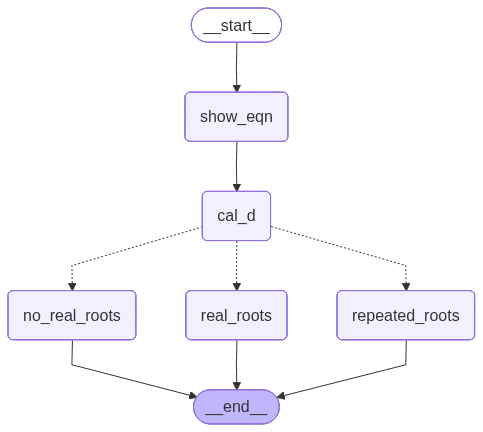

In [17]:
# Building the Graph
graph = StateGraph(QdState)

# Creatind node
graph.add_node("show_eqn", show_eqn)
graph.add_node("cal_d", cal_d)
graph.add_node("no_real_roots", no_real_roots)
graph.add_node("real_roots", real_roots)
graph.add_node("repeated_roots", repeated_roots)

# Add edge
graph.add_edge(START, "show_eqn")
graph.add_edge("show_eqn", "cal_d")

graph.add_conditional_edges("cal_d", check_cond)
# graph.add_edge("cal_d", "real_roots")
# graph.add_edge("cal_d", "no_real_roots")
# graph.add_edge("cal_d", "repeated_roots")
graph.add_edge("real_roots",END)
graph.add_edge("no_real_roots",END)
graph.add_edge("repeated_roots",END)

# Compile the graph
workflow = graph.compile()
workflow

In [16]:
initial_state = {
    "a": 4, "b":-5, "c":-4
}
workflow.invoke(initial_state)

{'a': 4,
 'b': -5,
 'c': -4,
 'equation': '4x2+ -5x + -4',
 'discriminant': 89,
 'result': 'The roots are 28.867962264113206 and -8.867962264113206'}